In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [222]:
df=pd.read_csv("data.xlsx - Sheet1.csv")

In [223]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [224]:
df.shape

(3998, 39)

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [226]:
df.duplicated().sum()

0

In [227]:
df['DOJ']=pd.to_datetime(df['DOJ'])

C:\Users\bojja\AppData\Local\Temp\ipykernel_20036\3402479916.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DOJ']=pd.to_datetime(df['DOJ'])


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   float64       
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   object        
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

# Univariate Analysis

<Axes: >

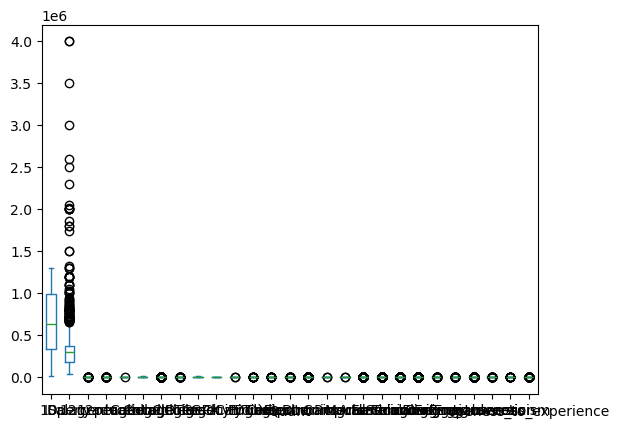

In [230]:
df.plot(kind="box")

In [231]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

In [232]:
numerical_columns.shape

(27,)

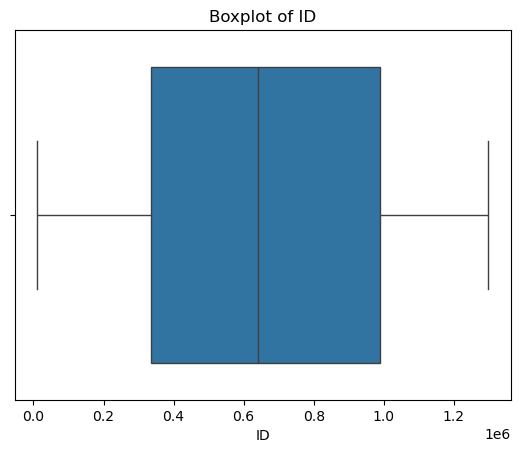

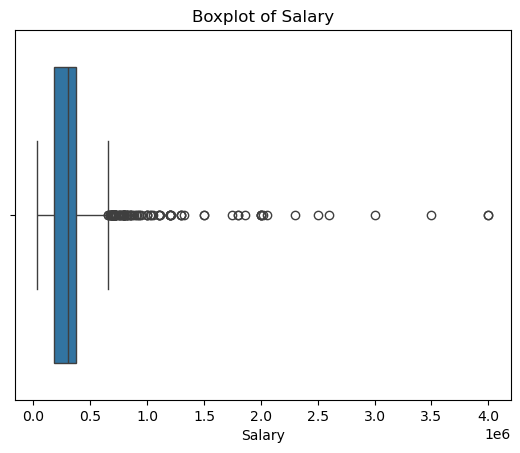

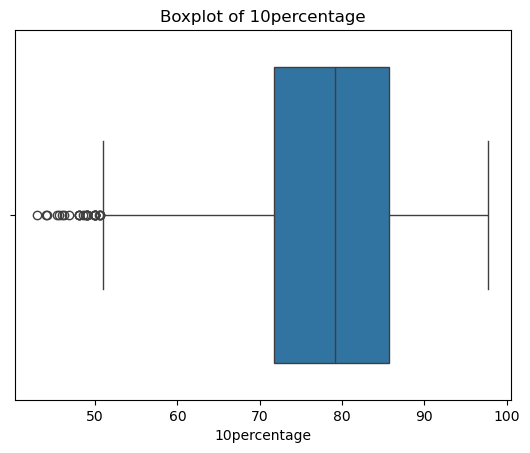

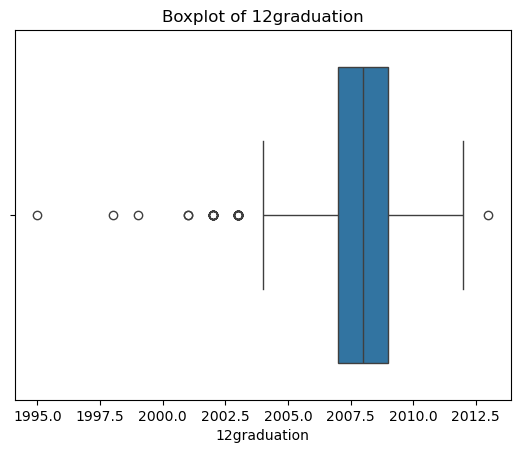

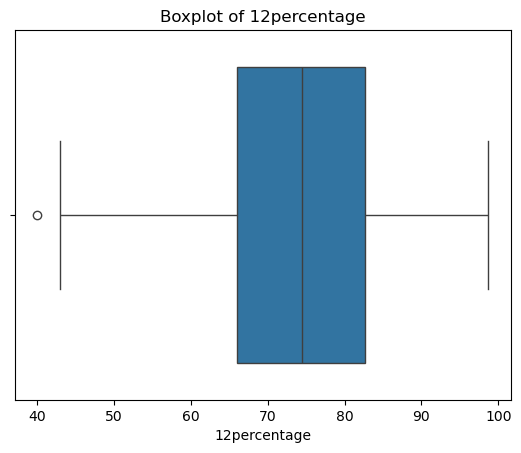

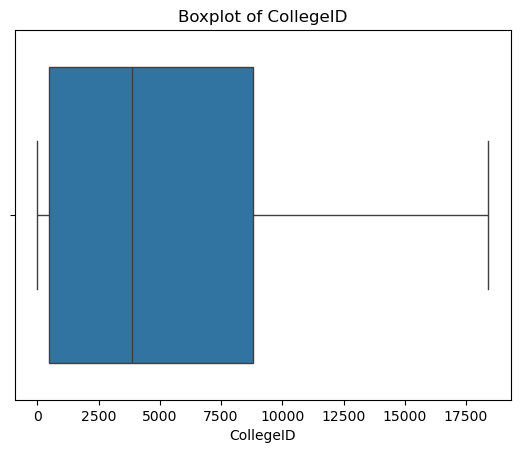

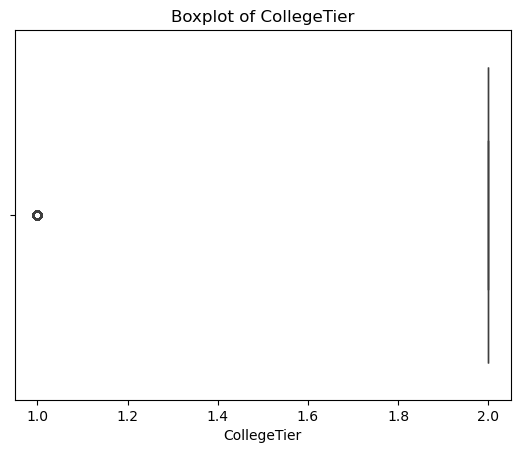

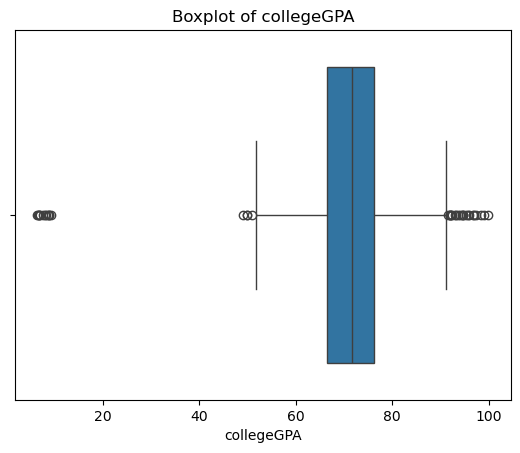

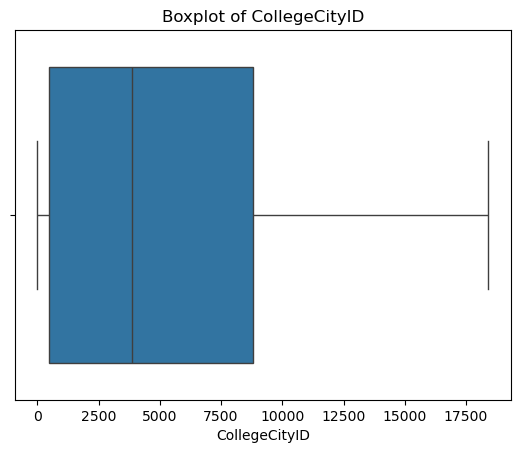

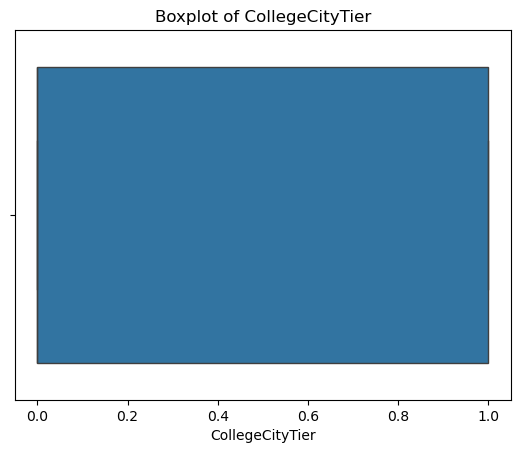

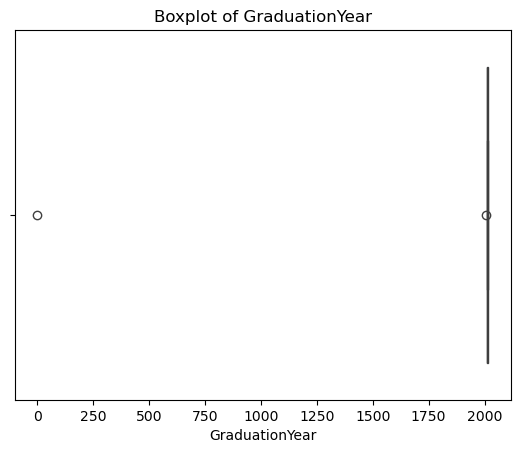

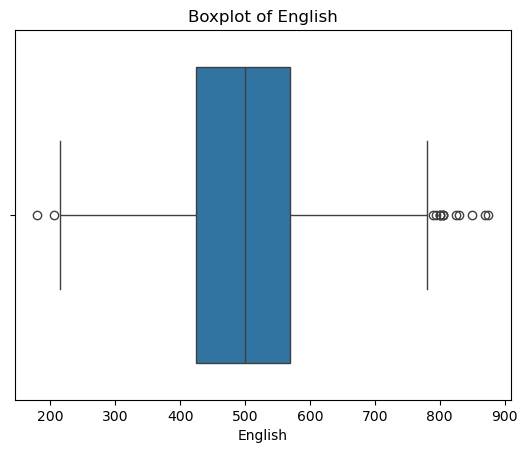

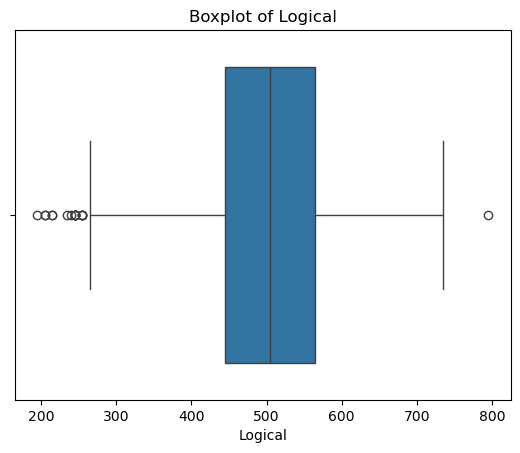

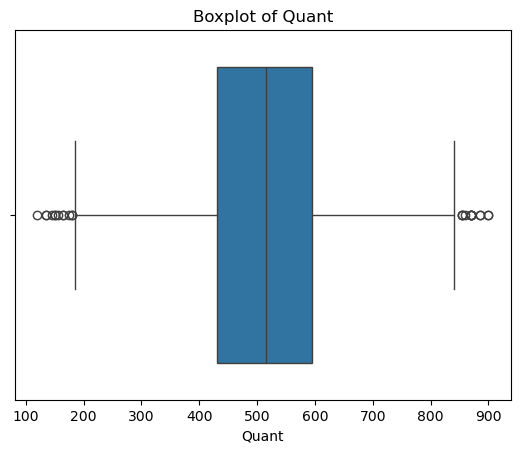

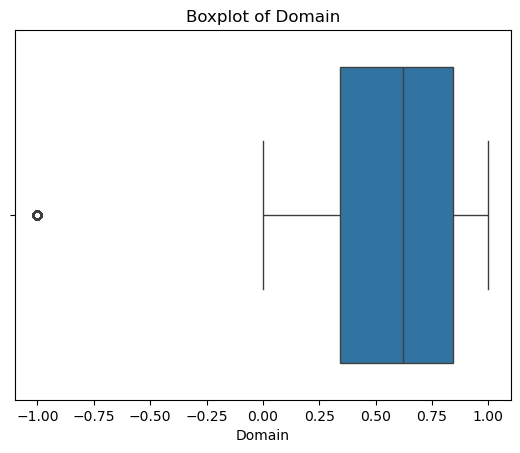

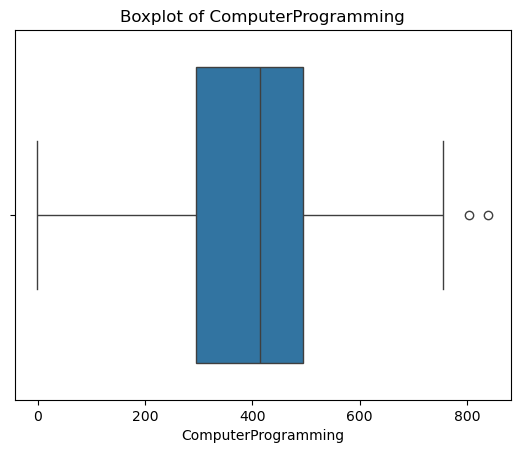

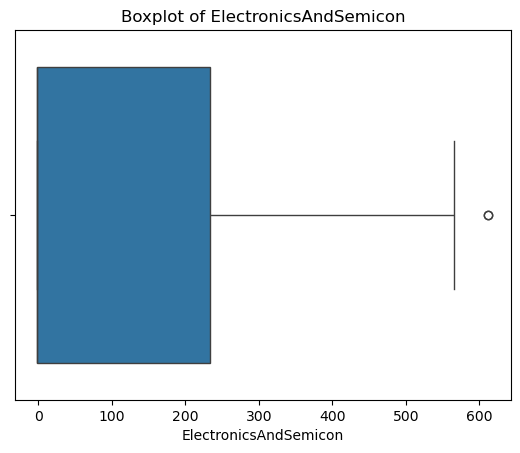

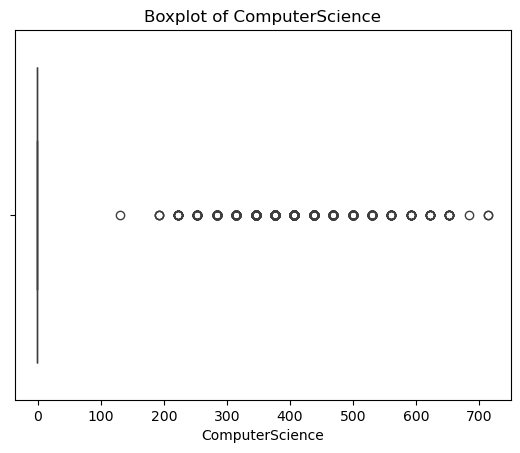

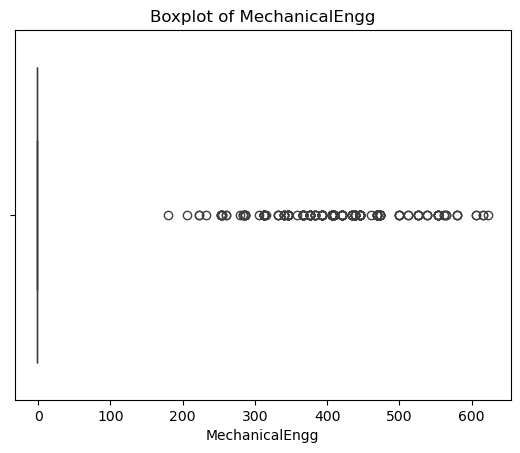

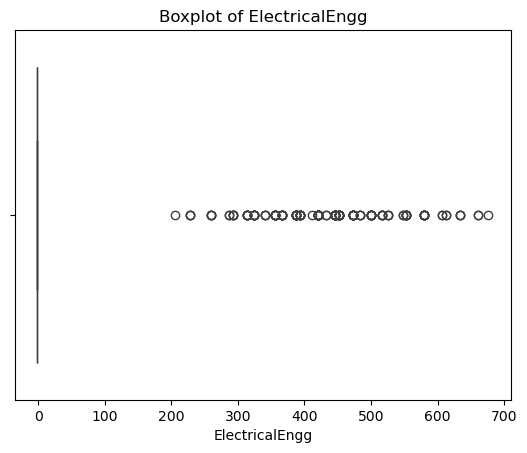

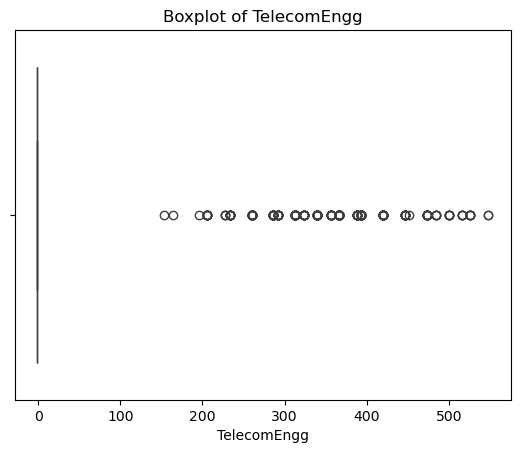

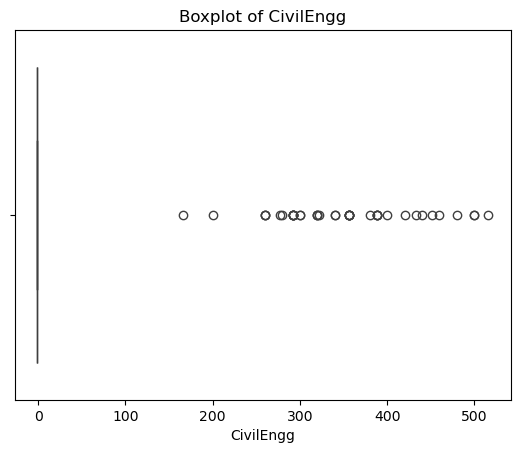

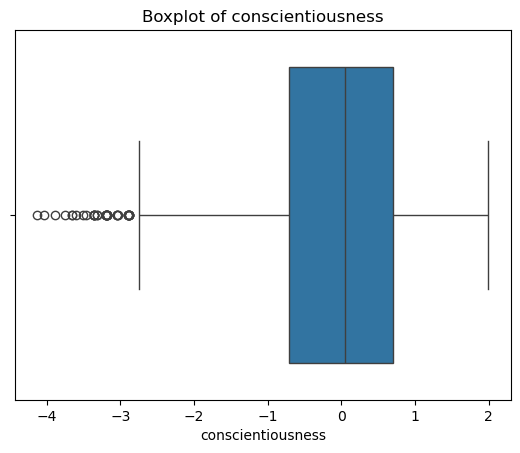

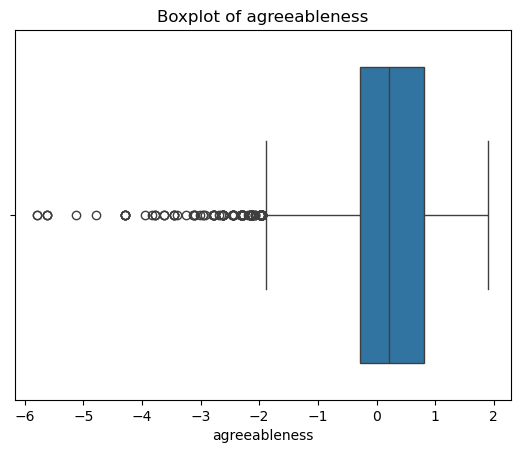

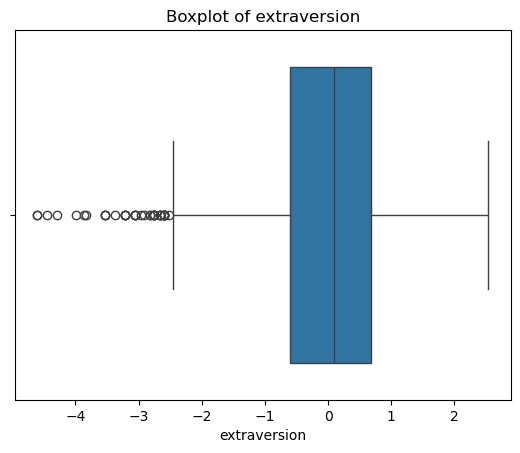

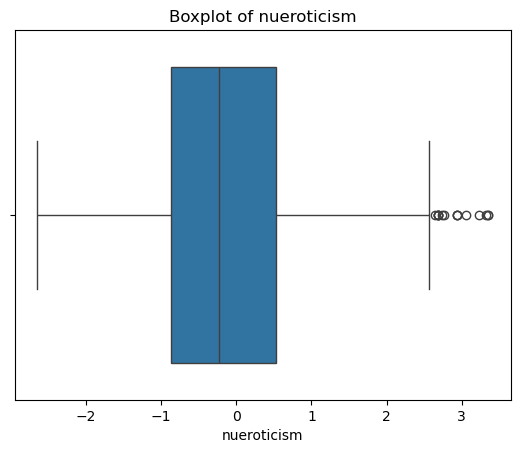

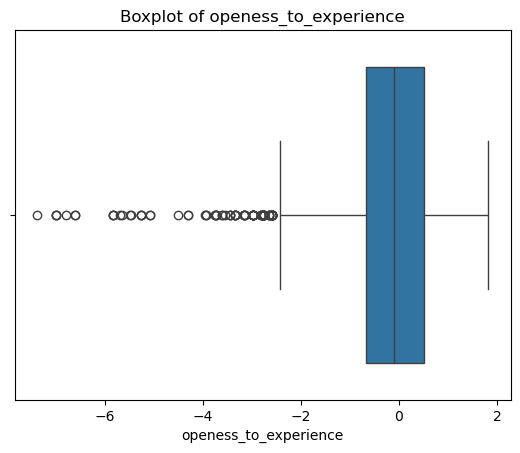

In [233]:
for column in numerical_columns:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [234]:
from scipy.stats import zscore

z_scores = zscore(df[numerical_columns])
outliers = df[(z_scores > 3) | (z_scores < -3)]

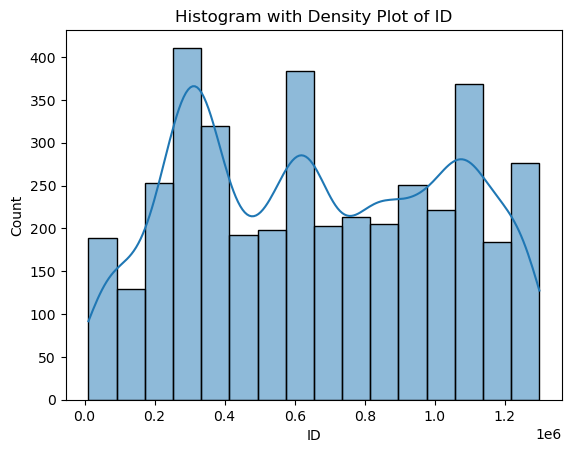

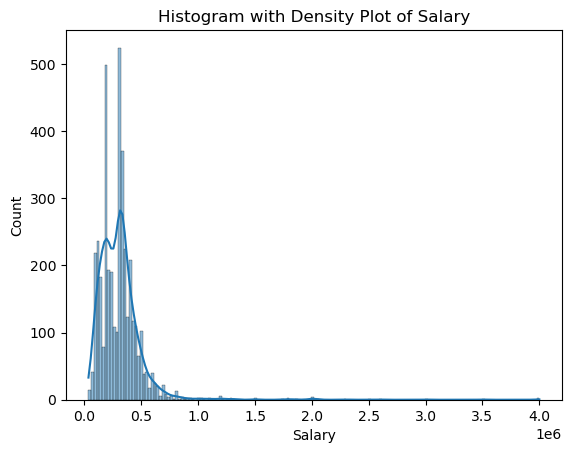

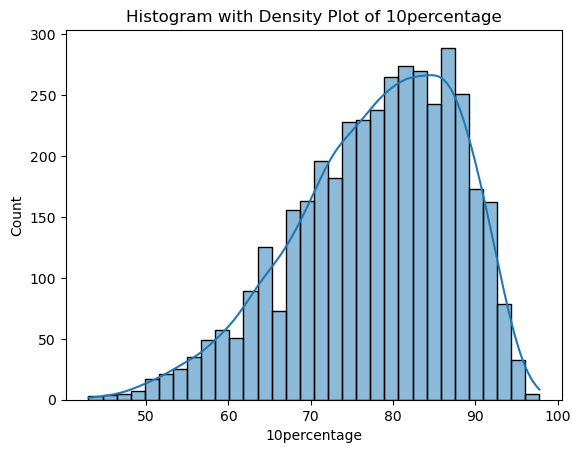

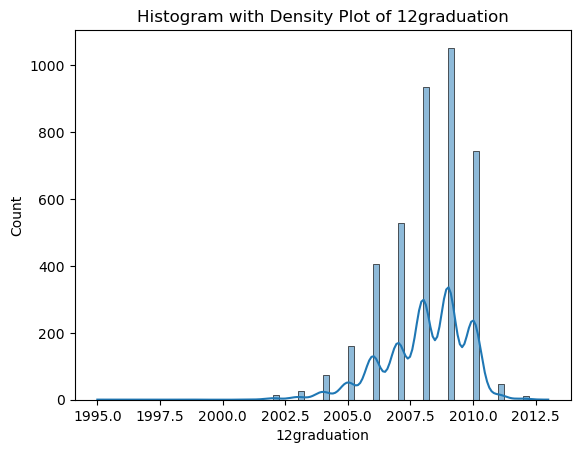

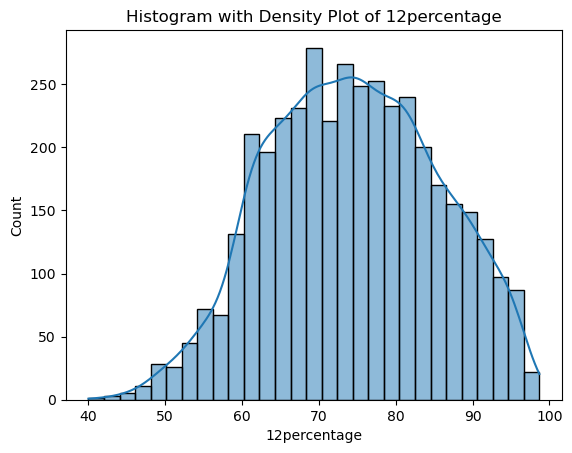

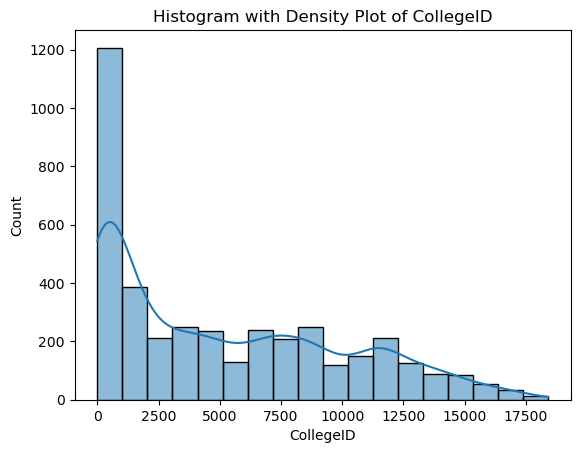

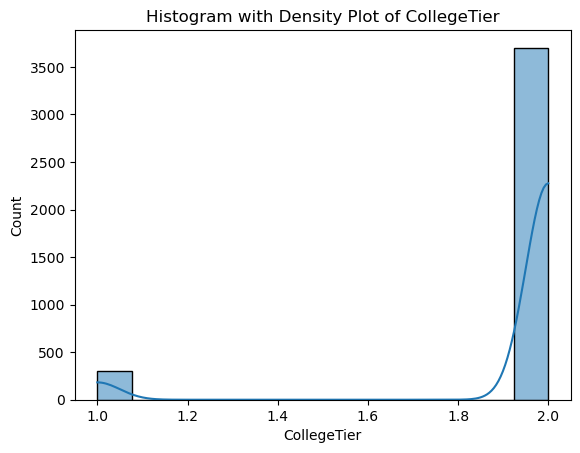

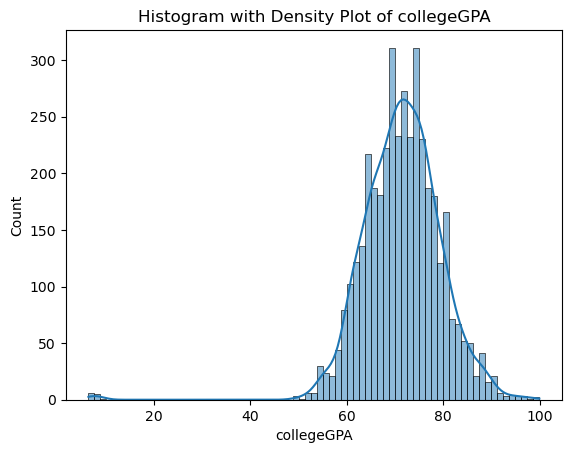

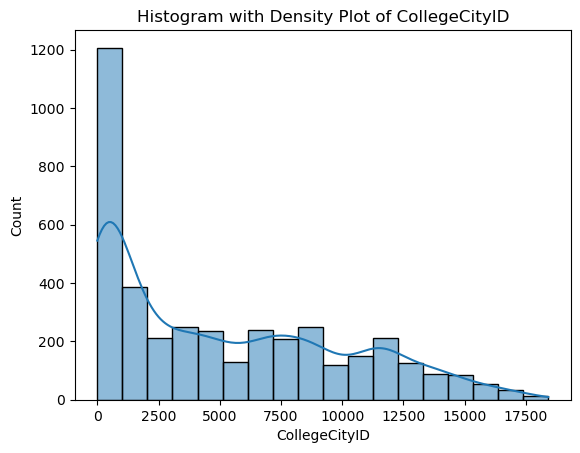

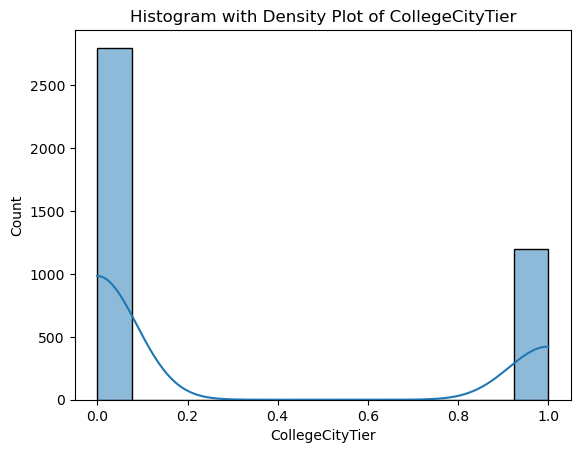

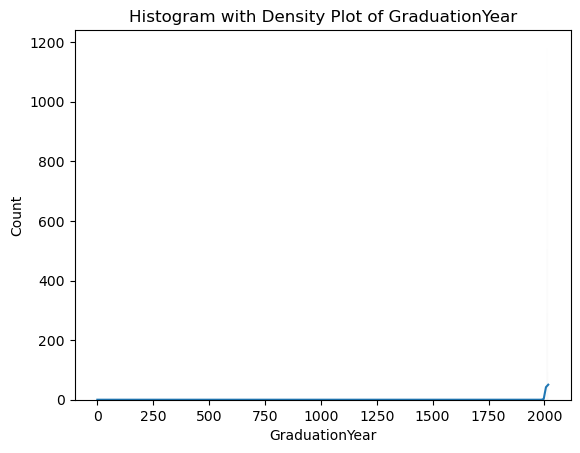

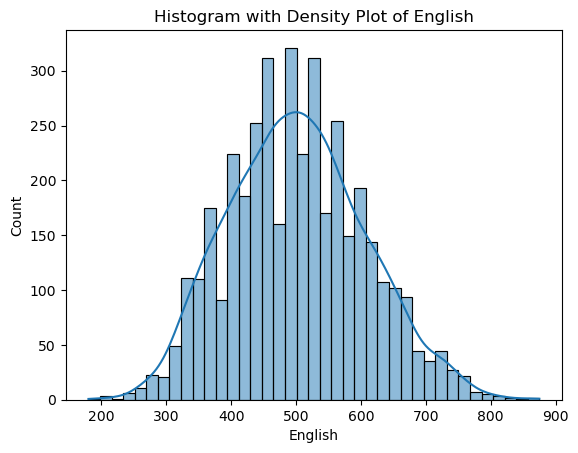

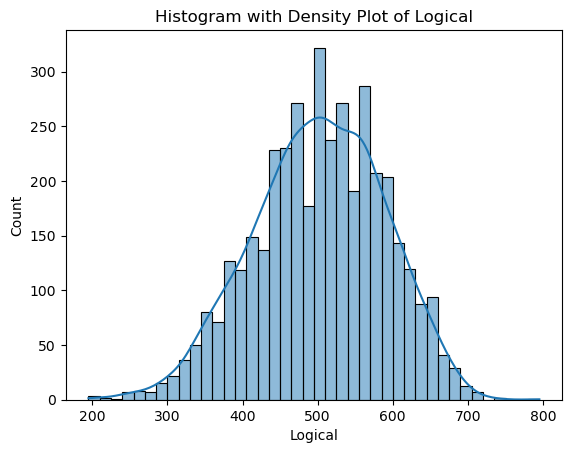

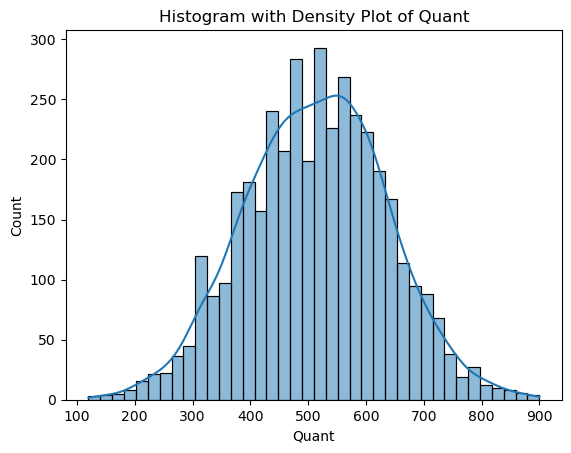

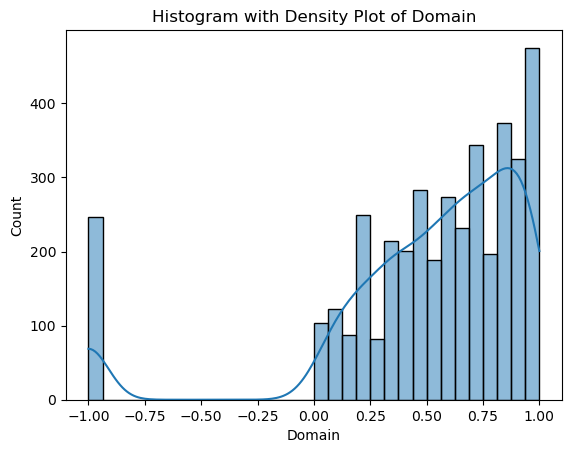

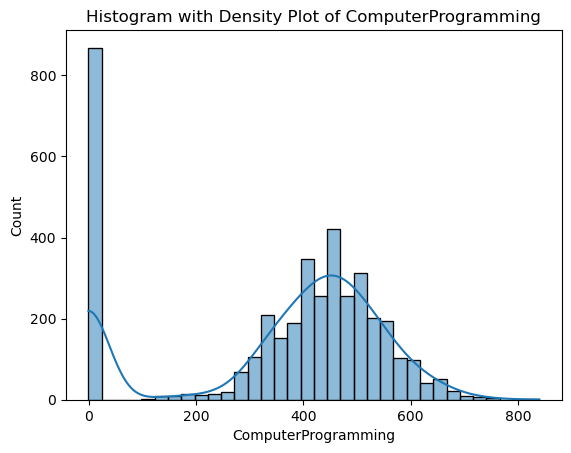

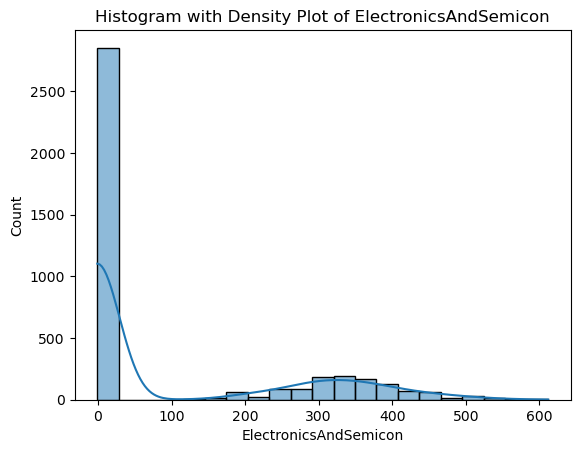

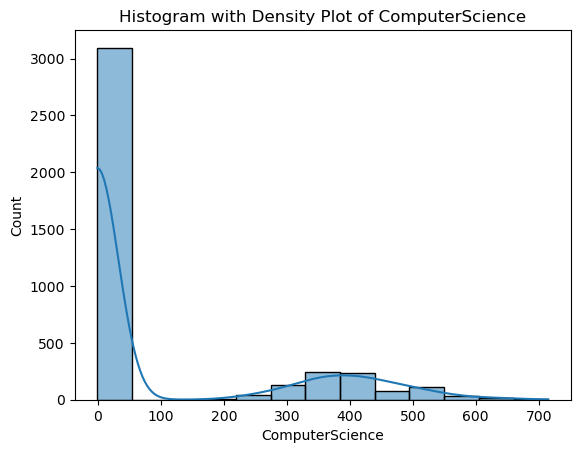

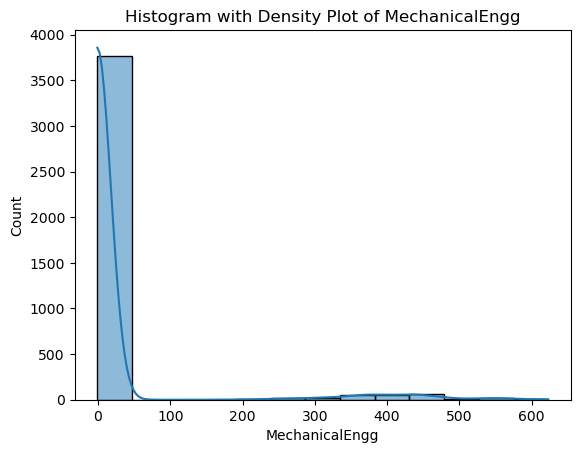

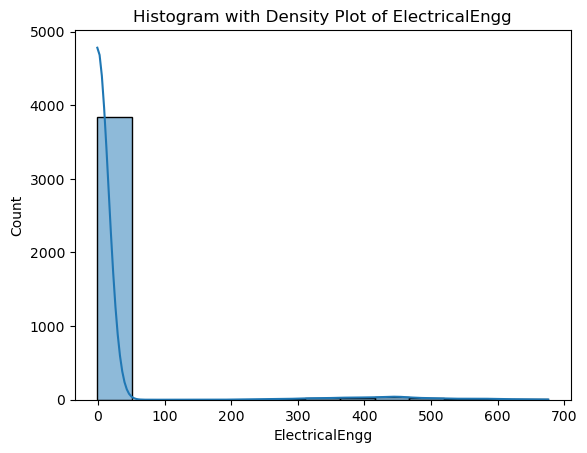

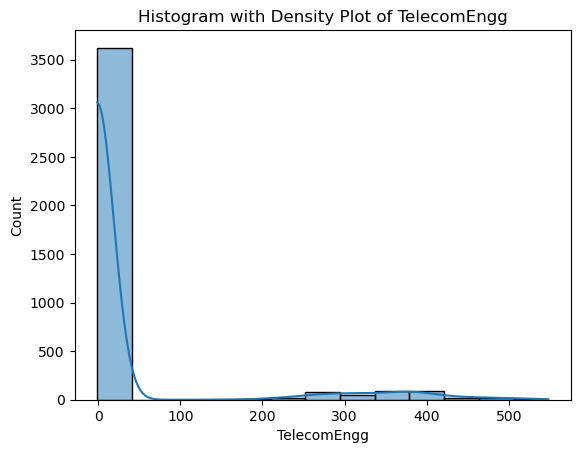

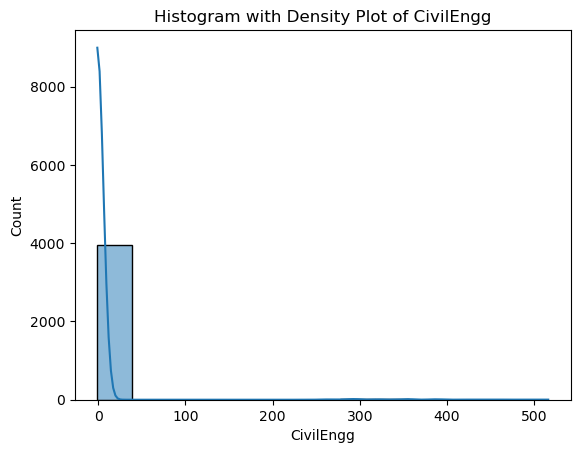

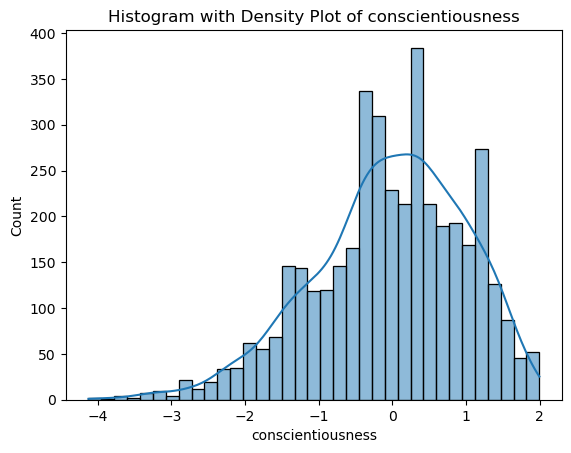

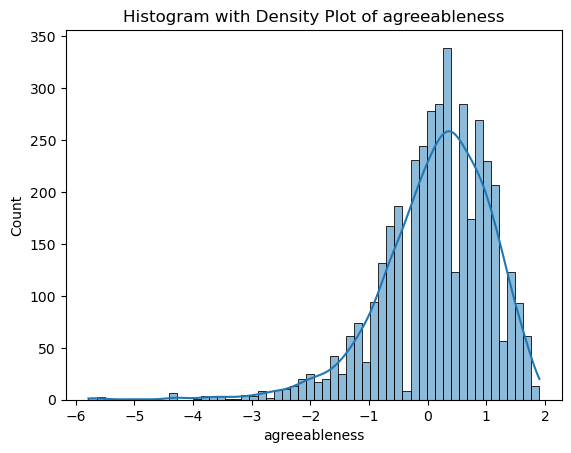

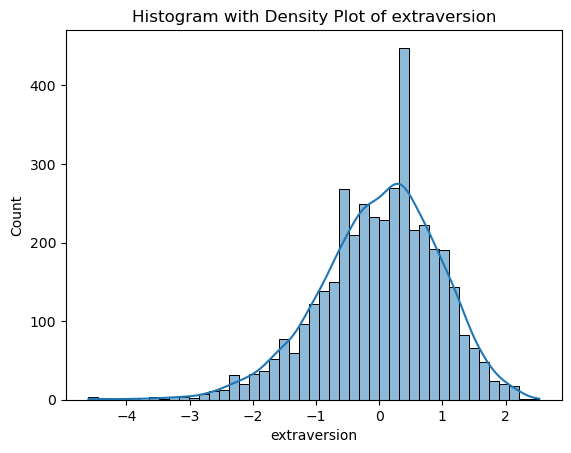

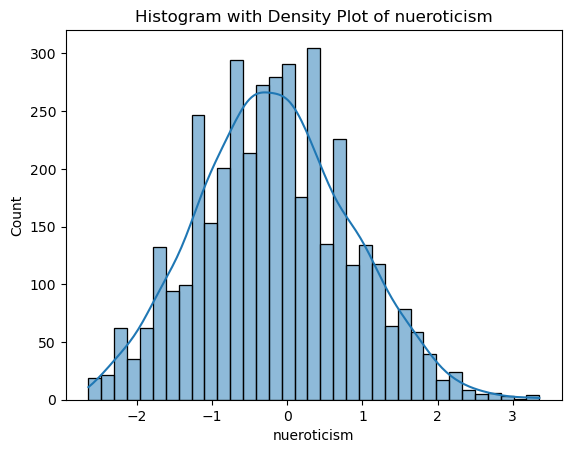

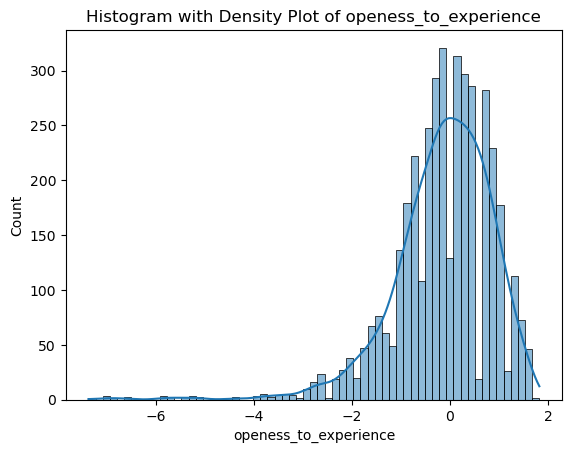

In [235]:
for column in numerical_columns:
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram with Density Plot of {column}')
    plt.show()

In [236]:
df.describe()

,ID,Salary,DOJ,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,2013-07-02 11:04:10.325162496,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
min,1.124400e+04,3.500000e+04,1991-06-01 00:00:00,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,2012-10-01 00:00:00,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,2013-11-01 00:00:00,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,2014-07-01 00:00:00,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,2015-12-01 00:00:00,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400
std,3.632182e+05,2.127375e+05,NaN,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075


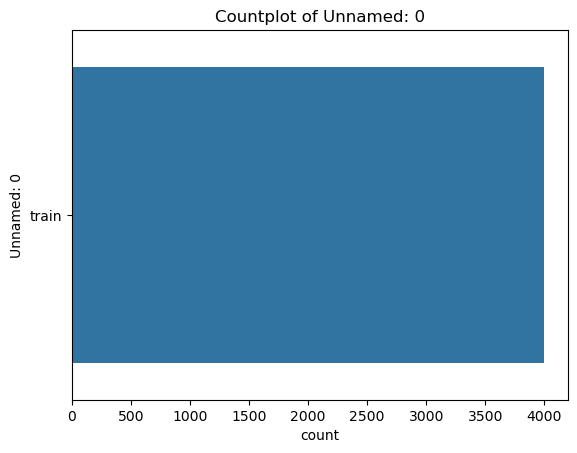

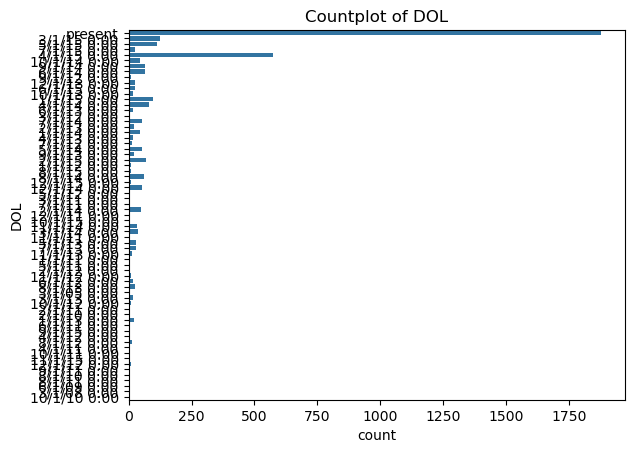

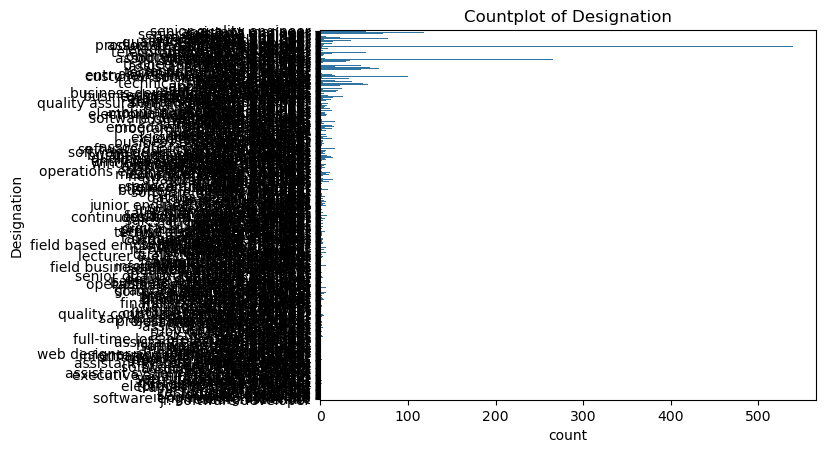

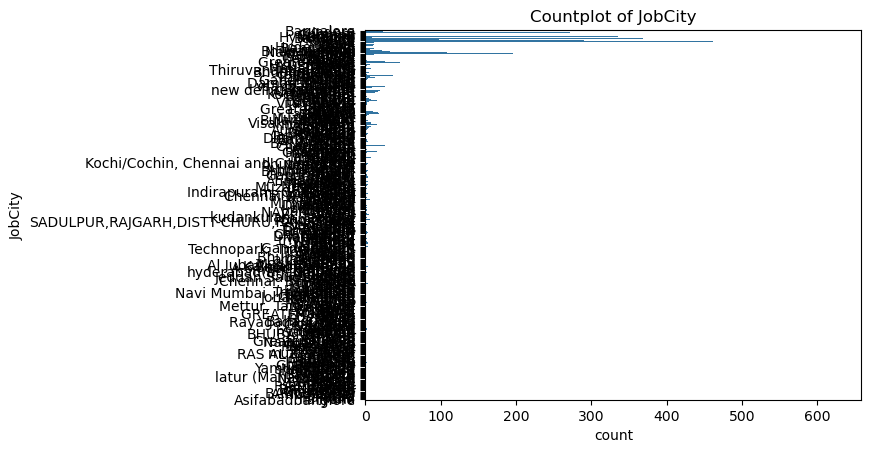

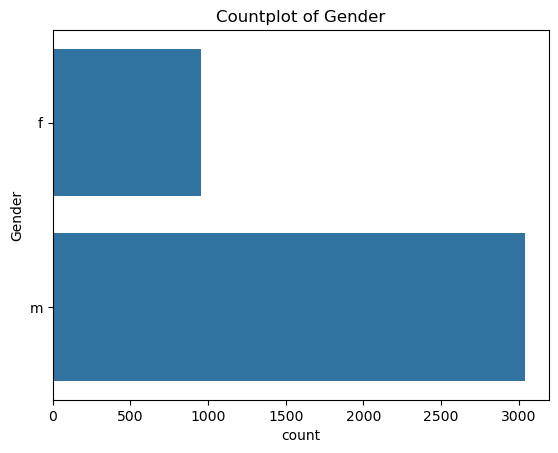

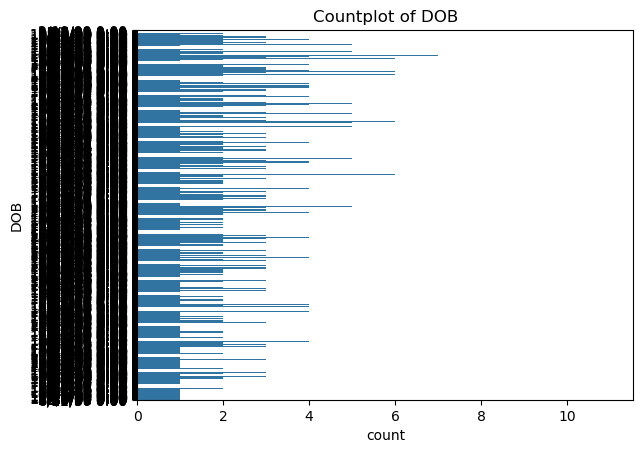

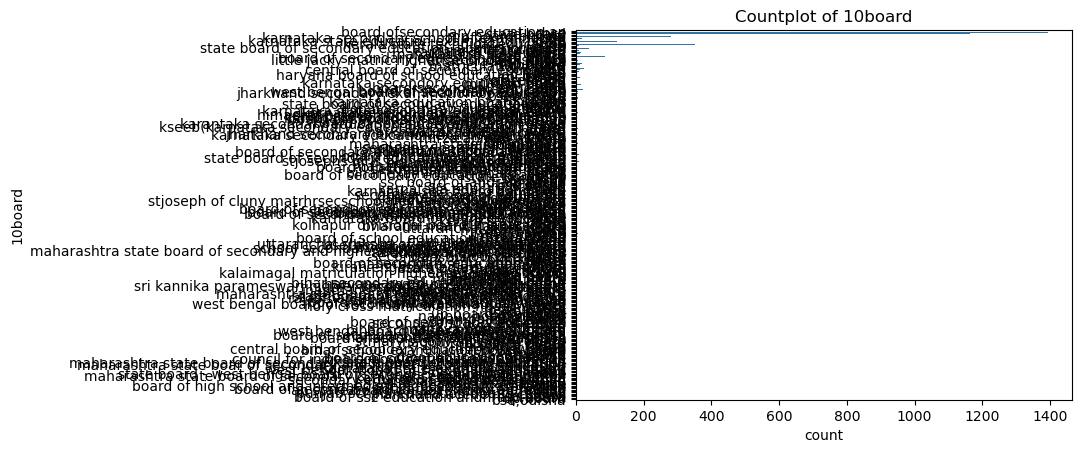

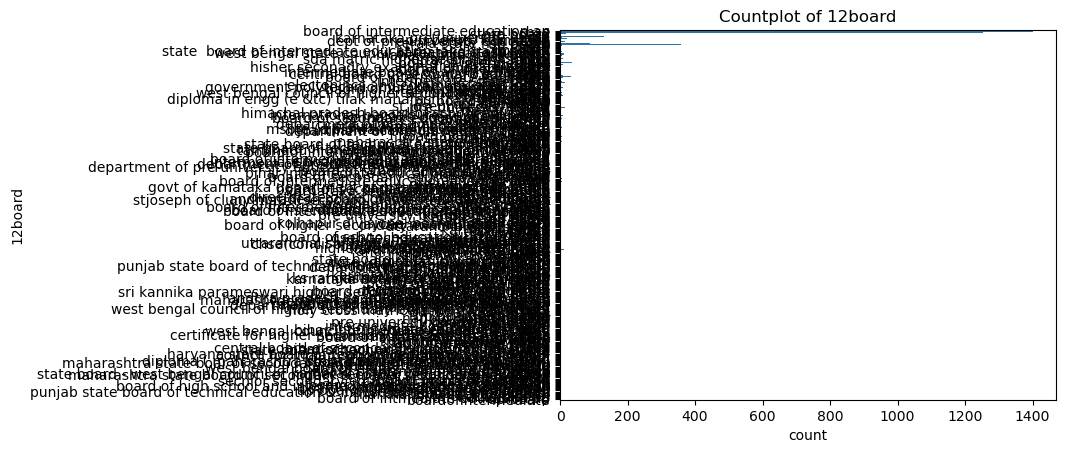

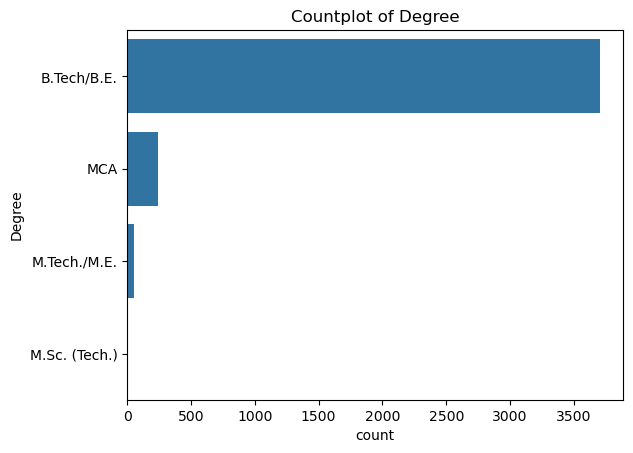

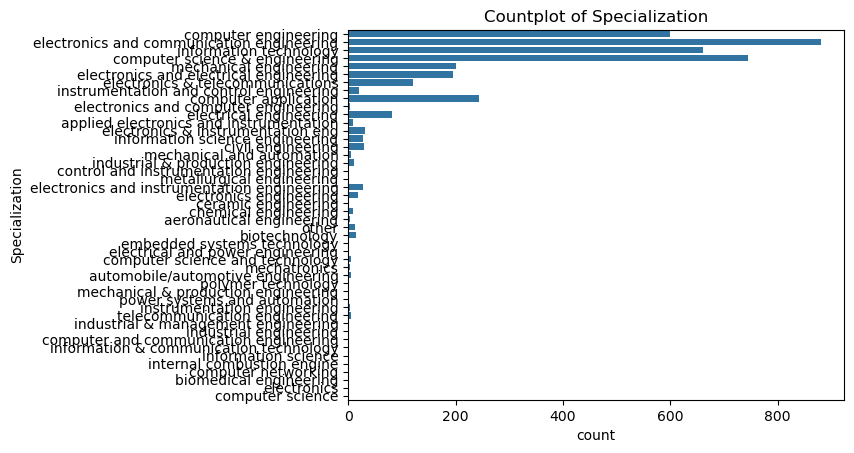

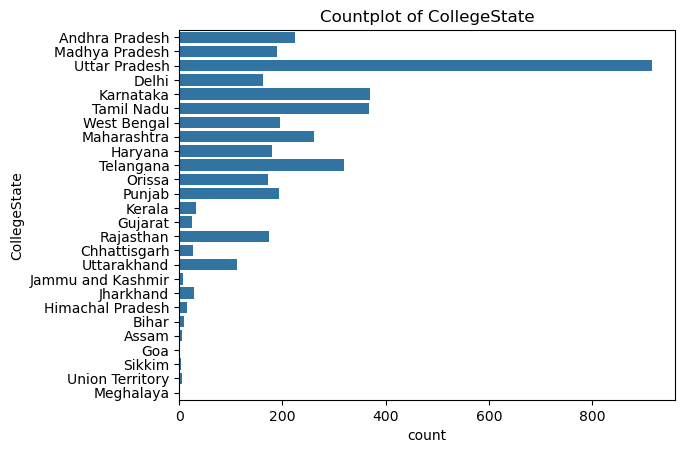

In [237]:
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    sns.countplot(df[column])
    plt.title(f'Countplot of {column}')
    plt.show()

<Axes: ylabel='Frequency'>

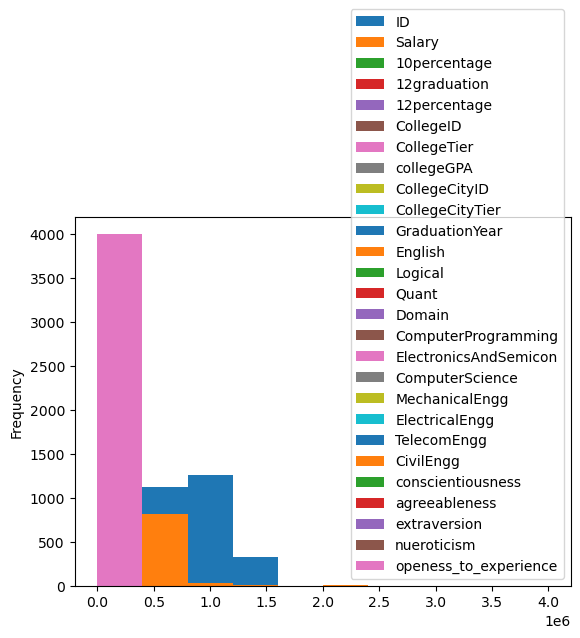

In [238]:
df.plot(kind="hist")

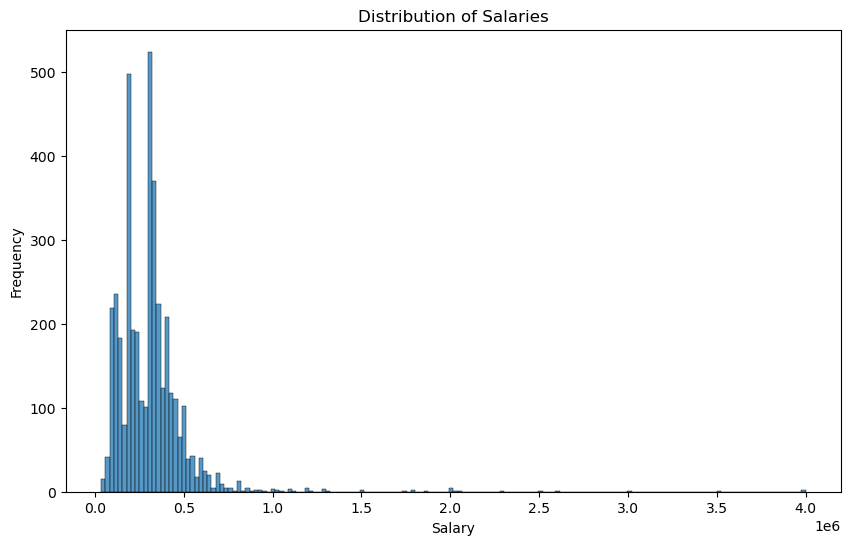

In [257]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'])
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

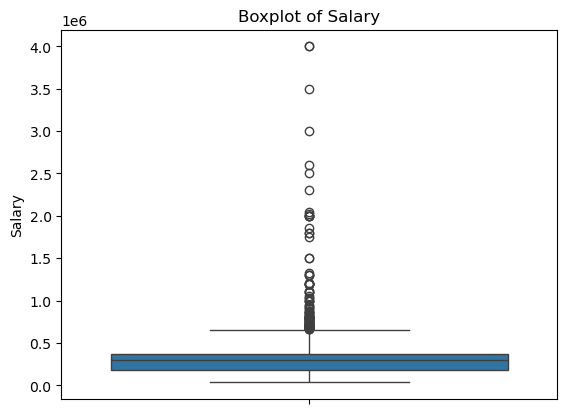

In [261]:
sns.boxplot(df['Salary'])
plt.title('Boxplot of Salary')
plt.savefig('Boxplot of Salary.png')
plt.show()

C:\Users\bojja\AppData\Local\Temp\ipykernel_20036\2223175534.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary'])


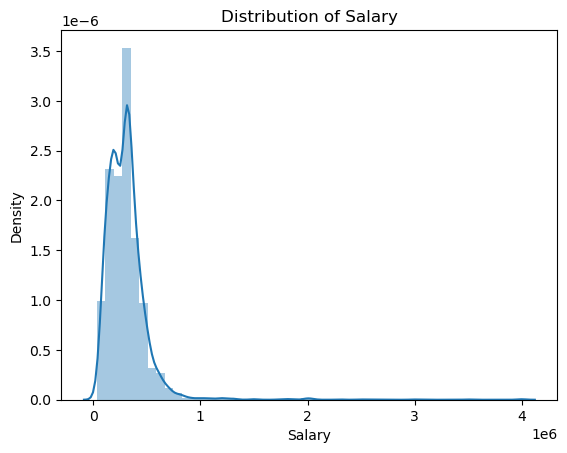

In [259]:
sns.distplot(df['Salary'])
plt.title('Distribution of Salary')
plt.savefig('Distribution of Salary.png')
plt.show()

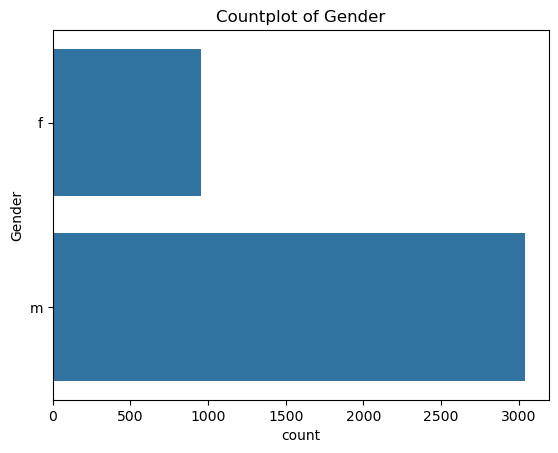

In [241]:
sns.countplot(df['Gender'])
plt.title('Countplot of Gender')
plt.show()

# Bivariate Analysis

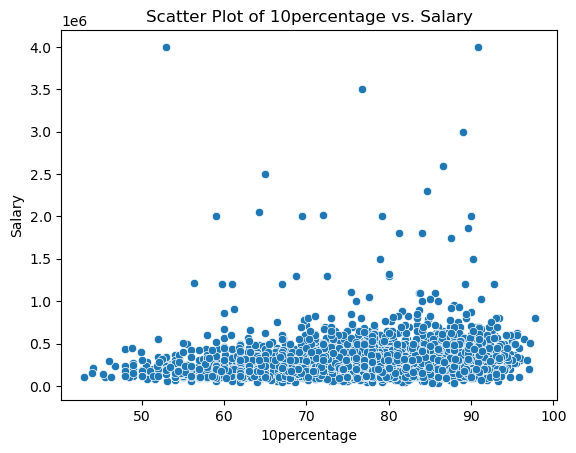

In [243]:
sns.scatterplot(x='10percentage', y='Salary', data=df)
plt.title('Scatter Plot of 10percentage vs. Salary')
plt.show()

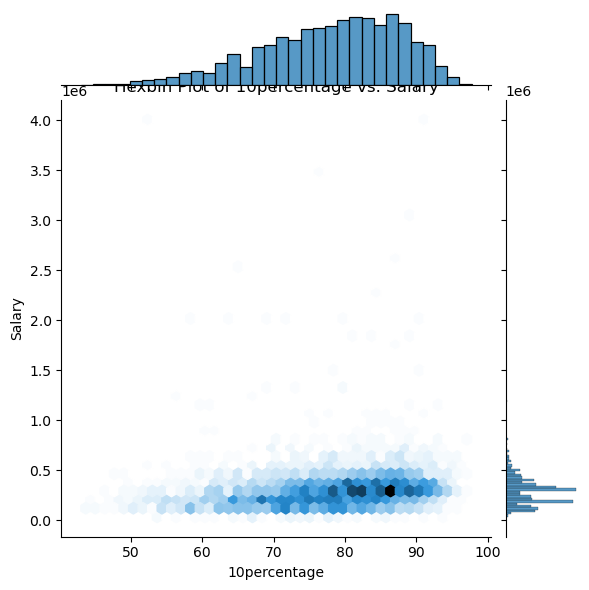

In [244]:
sns.jointplot(x='10percentage', y='Salary', data=df, kind='hex')
plt.title('Hexbin Plot of 10percentage vs. Salary')
plt.show()

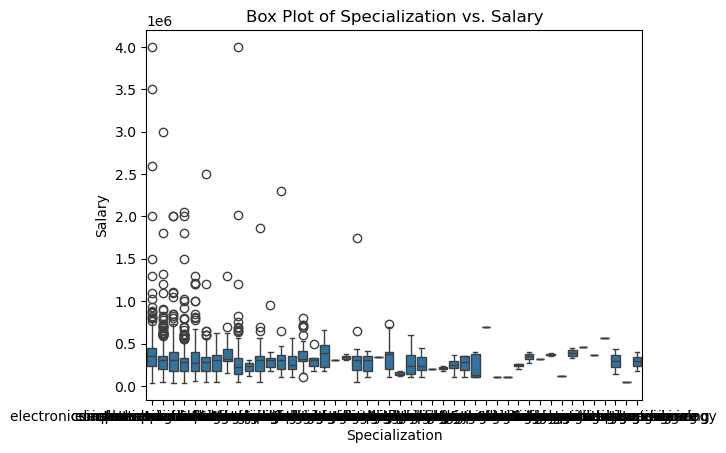

In [245]:
sns.boxplot(x='Specialization', y='Salary', data=df)
plt.title('Box Plot of Specialization vs. Salary')
plt.show()

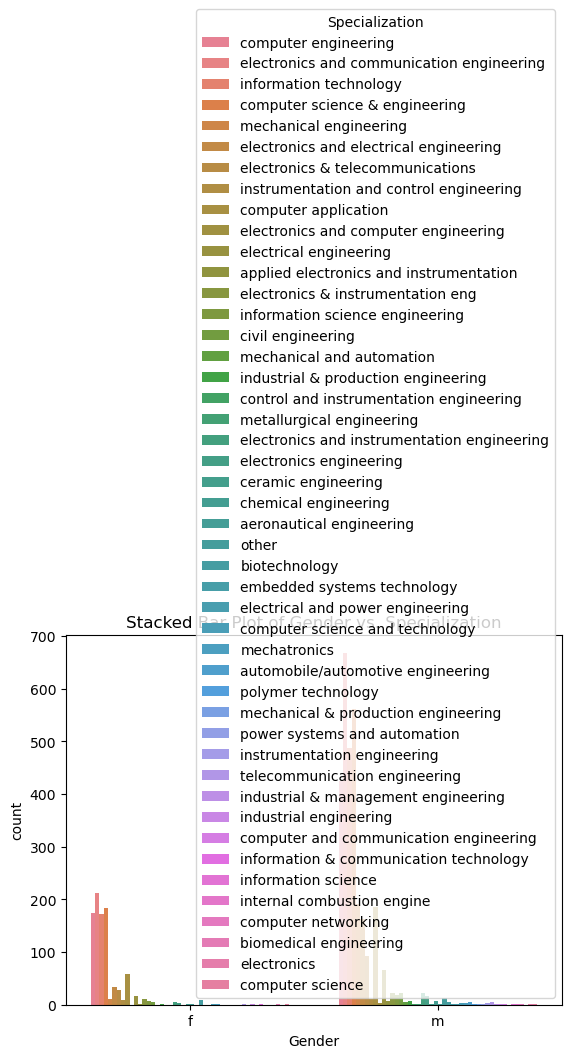

In [246]:
sns.countplot(x='Gender', hue='Specialization', data=df)
plt.title('Stacked Bar Plot of Gender vs. Specialization')
plt.show()

C:\Users\bojja\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\bojja\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 41.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\bojja\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 26.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\bojja\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 61.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


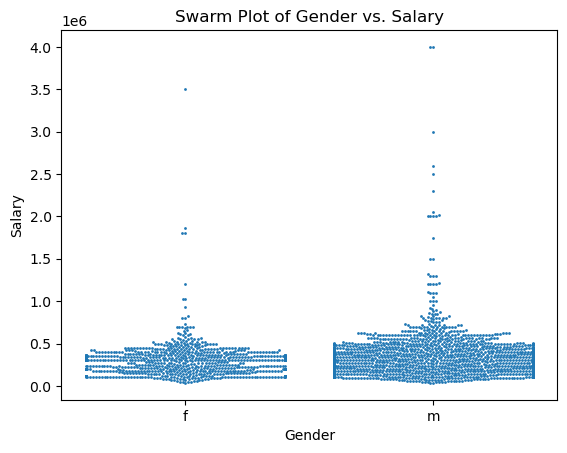

In [247]:
sns.swarmplot(x='Gender', y='Salary', data=df, size=2)  
plt.title('Swarm Plot of Gender vs. Salary')
plt.savefig('swarmplot_gender_vs_salary11.png', dpi=300) 
plt.show()

In [248]:
plt.savefig('swarmplot_gender_vs_salary.png', dpi=300) 

<Figure size 640x480 with 0 Axes>

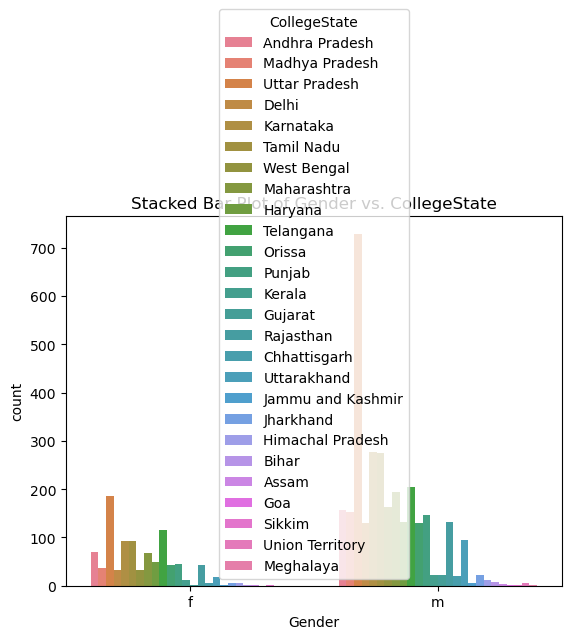

In [249]:
sns.countplot(x='Gender', hue='CollegeState', data=df)
plt.title('Stacked Bar Plot of Gender vs. CollegeState')
plt.show()

In [250]:
df['Specialization'].unique()

array(['computer engineering',
       'electronics and communication engineering',
       'information technology', 'computer science & engineering',
       'mechanical engineering', 'electronics and electrical engineering',
       'electronics & telecommunications',
       'instrumentation and control engineering', 'computer application',
       'electronics and computer engineering', 'electrical engineering',
       'applied electronics and instrumentation',
       'electronics & instrumentation eng',
       'information science engineering', 'civil engineering',
       'mechanical and automation', 'industrial & production engineering',
       'control and instrumentation engineering',
       'metallurgical engineering',
       'electronics and instrumentation engineering',
       'electronics engineering', 'ceramic engineering',
       'chemical engineering', 'aeronautical engineering', 'other',
       'biotechnology', 'embedded systems technology',
       'electrical and power engi

In [251]:
df['Designation'].unique()

array(['senior quality engineer', 'assistant manager', 'systems engineer',
       'senior software engineer', 'get', 'system engineer',
       'java software engineer', 'mechanical engineer',
       'electrical engineer', 'project engineer', 'senior php developer',
       'senior systems engineer', 'quality assurance engineer',
       'qa analyst', 'network engineer', 'product development engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'developer', 'electrical project engineer',
       'programmer analyst', 'systems analyst', 'ase',
       'telecommunication engineer', 'application developer',
       'ios developer', 'executive assistant', 'online marketing manager',
       'documentation specialist', 'associate software engineer',
       'management trainee', 'site manager', 'software developer',
       '.net developer', 'production engineer', 'jr. software engineer',
       'trainee software developer', 'ui developer',
       'assi

In [252]:
# Attempt to parse dates with a more flexible approach
df['DOL'] = df['DOL'].apply(lambda x: pd.to_datetime(x, errors='coerce') if isinstance(x, str) else x)
df['Experience'] = (df['DOL'] - df['DOJ']).dt.days / 365
# Filter for Computer Science Engineering graduates
cs_grads = df[df['Specialization'] == 'computer science & engineering']

# Identify relevant designations
designations = ['programming analyst', 'software engineer', 'hardware engineer', 'associate engineer']
fresh_grads = cs_grads[(cs_grads['Designation'].isin(designations)) & (cs_grads['Experience'] < 1)]

# Calculate average salaries
average_salaries = fresh_grads.groupby('Designation')['Salary'].mean()

# Compare to the specified range
print(average_salaries)

# Relationship between gender and specialization
contingency_table = pd.crosstab(df['Gender'], df['Specialization'])

from scipy.stats import chi2_contingency
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p_value)

Designation
software engineer    269677.419355
Name: Salary, dtype: float64
Chi-square statistic: 104.46891913608455
P-value: 1.2453868176976918e-06


In [253]:
numerical_columns

Index(['ID', 'Salary', '10percentage', '12graduation', '12percentage',
       'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityID',
       'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [254]:
df[numerical_columns].corr()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
ID,1.000000,-0.247294,0.044547,0.673102,0.007069,0.284540,0.035160,0.047144,0.284540,-0.035977,...,0.482626,-0.026147,0.104454,-0.049272,-0.017871,0.175557,0.024837,0.120979,-0.146289,0.031359
Salary,-0.247294,1.000000,0.177373,-0.161383,0.170254,-0.118690,-0.179332,0.130103,-0.118690,0.015384,...,-0.100720,0.018475,-0.047598,-0.022691,0.037639,-0.064148,0.057423,-0.010213,-0.054685,-0.011312
10percentage,0.044547,0.177373,1.000000,0.269957,0.643378,0.021082,-0.126042,0.312538,0.021082,0.116707,...,-0.018933,0.050364,0.074419,0.049378,0.030002,0.067657,0.136645,-0.004679,-0.132496,0.036692
12graduation,0.673102,-0.161383,0.269957,1.000000,0.259166,0.254021,0.027691,0.086001,0.254021,-0.003016,...,0.293439,0.035459,0.123751,0.023470,-0.004727,0.103329,0.041182,0.061956,-0.074369,-0.015069
12percentage,0.007069,0.170254,0.643378,0.259166,1.000000,0.022336,-0.100771,0.346137,0.022336,0.130462,...,-0.043534,0.037635,0.064001,0.044201,0.005910,0.058299,0.103998,-0.007486,-0.094369,0.006332
CollegeID,0.284540,-0.118690,0.021082,0.254021,0.022336,1.000000,0.067054,0.017240,1.000000,0.007757,...,0.102303,-0.009291,0.022933,0.025620,0.005749,0.076432,-0.005264,0.005917,-0.008973,-0.010678
CollegeTier,0.035160,-0.179332,-0.126042,0.027691,-0.100771,0.067054,1.000000,-0.086781,0.067054,-0.101494,...,0.001053,-0.021548,0.002594,0.000007,-0.033722,0.055174,-0.038055,0.009970,0.023778,-0.019179
collegeGPA,0.047144,0.130103,0.312538,0.086001,0.346137,0.017240,-0.086781,1.000000,0.017240,0.017471,...,0.007601,-0.031765,0.052258,-0.005226,-0.018950,0.069582,0.068282,-0.032684,-0.074859,0.028071
CollegeCityID,0.284540,-0.118690,0.021082,0.254021,0.022336,1.000000,0.067054,0.017240,1.000000,0.007757,...,0.102303,-0.009291,0.022933,0.025620,0.005749,0.076432,-0.005264,0.005917,-0.008973,-0.010678
CollegeCityTier,-0.035977,0.015384,0.116707,-0.003016,0.130462,0.007757,-0.101494,0.017471,0.007757,1.000000,...,-0.010643,-0.052395,0.010311,0.049876,-0.033392,0.014763,0.005565,-0.008203,0.004442,-0.016790


In [255]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [256]:
from graphviz import Digraph  

# Create a new directed graph  
dot = Digraph()  

# Add nodes for different stages of data transformation  
dot.node('A', 'Raw Data')  
dot.node('B', 'Data Cleaning')  
dot.node('C', 'Data Transformation')  
dot.node('D', 'Feature Engineering')  
dot.node('E', 'Data Normalization')  
dot.node('F', 'Structured Data')  

# Add edges to show the flow of the process  
dot.edge('A', 'B', 'Step 1: Clean Data')  
dot.edge('B', 'C', 'Step 2: Transform Data')  
dot.edge('C', 'D', 'Step 3: Engineer Features')  
dot.edge('D', 'E', 'Step 4: Normalize Data')  
dot.edge('E', 'F', 'Step 5: Structured Output')  

# Render the flowchart to a file  
dot.render('data_transformation_flowchart', format='png', cleanup=True)  

# Optional: Save the graph to a file  
dot.save('data_transformation_flowchart.dot')  

print("Flowchart has been created and saved as 'data_transformation_flowchart.png'")

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
# Relationship Between Salary and Other Variables:

In [ ]:
#Gender and Specialization:

In [ ]:
#Additional Research Questions and Insights